<h1> What are the most-filmed spots in New York?</h1>

I am interested in looking at the most-filmed neighborhoods in NYC. To do this, I will be looking at the film permits issued by Mayor's Office of Film, Theatre and Broadcasting between 2012 - 2017. 

Data source: NYC Open Data, https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p

<h3>Introduction</h3>

Film permits are not limited to filming activity. The Mayor's Office considers filming, photography, production, television or radio activity as a filming activity that require film permits if the activity
<li>requires the use of vehicles or equipment;
<li>involves the assertion by any means, including physical or verbal, of exclusive use of one or more lanes of a street or walkway of a bridge or if such activity involves the assertion by any means, including
physical or verbal, of exclusive use of more than one-half of a sidewalk or other pedestrian
passageway or,
<li>in a situation in which the sidewalk or pedestrian passageway is narrower than
sixteen feet, if such activity involves the assertion by any means, including physical or verbal, of
exclusive use of the sidewalk or pedestrian passageway such that less than eight feet is otherwise
available for pedestrian use. 
   
   
That said, personal filming that does not inhibit the daily ongoings of the city are permissible. 

The analysis of film permits will therefore restrict our conclusion of the most-filmed neighborhoods in NYC to those filming activities that require a film permit, i.e. larger productions.


<h3>1. Looking at the Data</h3>

Let's look at the data variables and figure out which variables are the most useful for the purpose of this analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Film_Permits.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47324 entries, 0 to 47323
Data columns (total 14 columns):
EventID              47324 non-null int64
EventType            47324 non-null object
StartDateTime        47324 non-null object
EndDateTime          47324 non-null object
EnteredOn            47324 non-null object
EventAgency          47324 non-null object
ParkingHeld          47324 non-null object
Borough              47324 non-null object
CommunityBoard(s)    47313 non-null object
PolicePrecinct(s)    47313 non-null object
Category             47324 non-null object
SubCategoryName      47324 non-null object
Country              47324 non-null object
ZipCode(s)           47313 non-null object
dtypes: int64(1), object(13)
memory usage: 5.1+ MB


<h3>Data Cleaning</h3> 
In this step I am getting rid of the columns unnecessary for this analysis, such as EventAgency and Country since they  contain the same datafield. I am also removing CommunityBoard and PolicePrecinct which are not relevant to the analysis. 

In [2]:
df = df.sort_values(df.columns[0], ascending="True") ## sort by EventId
df = df.reset_index(drop=True)
df = df.drop(["EventAgency","CommunityBoard(s)","PolicePrecinct(s)","Country"], axis=1) ## drop the unused categories


In [3]:
df.columns = ['id','event','start','end','enteredon','parkingheld','borough','category','subcategory','zipcode']
df.head(14)

,id,event,start,end,enteredon,parkingheld,borough,category,subcategory,zipcode
0,42069,Theater Load in and Load Outs,01/02/2012 07:00:00 AM,01/27/2012 10:00:00 PM,12/07/2011 04:38:54 PM,WEST 44 STREET between 7 AVENUE and 8 AVENUE,Manhattan,Theater,Theater,10036
1,42287,Shooting Permit,01/05/2012 01:00:00 PM,01/05/2012 11:30:00 PM,12/09/2011 02:08:35 PM,WEST 65 STREET between BROADWAY and WEST END...,Manhattan,Theater,Theater,10023
2,42581,Shooting Permit,01/03/2012 10:00:00 AM,01/03/2012 09:00:00 PM,12/14/2011 09:56:47 AM,"46 ROAD between 5 STREET and VERNON BOULEVARD,...",Queens,Television,Episodic series,11101
3,42727,Shooting Permit,01/03/2012 08:00:00 AM,01/03/2012 10:00:00 PM,12/15/2011 01:27:48 PM,22ND STREET between QUEENS PLAZA SOUTH and 43R...,Queens,Television,Episodic series,11101
4,42737,Theater Load in and Load Outs,01/02/2012 06:00:00 AM,01/18/2012 08:00:00 PM,12/15/2011 02:06:52 PM,WEST 46 STREET between 7 AVENUE and 8 AVENUE,Manhattan,Theater,Theater,10036
5,42780,Theater Load in and Load Outs,01/02/2012 06:00:00 PM,01/03/2012 12:00:00 AM,12/15/2011 05:47:56 PM,WEST 56 STREET between 7 AVENUE and 6 AVENUE,Manhattan,Theater,Theater,10019
6,42781,Theater Load in and Load Outs,01/03/2012 12:00:00 AM,01/03/2012 06:00:00 PM,12/15/2011 05:52:18 PM,WEST 56 STREET between 7 AVENUE and 6 AVENUE,Manhattan,Theater,Theater,10019
7,42804,Shooting Permit,01/09/2012 06:30:00 AM,01/09/2012 09:00:00 PM,12/16/2011 11:30:58 AM,EAGLE STREET between WEST STREET and FRANKLIN ...,Brooklyn,Television,Episodic series,11222
8,42825,Shooting Permit,01/04/2012 07:00:00 AM,01/04/2012 10:00:00 PM,12/16/2011 03:04:01 PM,EAST 12 STREET between 4 AVENUE and 3 AVENUE...,Manhattan,Television,Episodic series,10003
9,42847,Shooting Permit,01/03/2012 07:00:00 AM,01/04/2012 11:00:00 PM,12/16/2011 07:35:40 PM,STARR AVENUE between VAN DAM STREET and BORDEN...,Queens,Television,Episodic series,11101


[NOTE on Zipcodes]

Some film permits were issued for multiple zipcodes with the same Event ID's (for example, on line 12 and 13).

For the first part of the analysis, the film permits will be considered by the unique Event ID's. Later in the geographical analysis, the zipcodes will be separated into their own entries.


<h2>2. Analysis by Time</h2>
<h3>2.1 Average Length of a Film Permit</h3>

First I want to see what the typical length of a film permit is.

In [4]:
df['start'] = pd.to_datetime(df['start'])
df['laun_month_year'] = df['start'].dt.to_period("M")
df['laun_year'] = df['start'].dt.to_period("A")

df['end'] = pd.to_datetime(df['end'])
df['dead_month_year'] = df['end'].dt.to_period("M")
df['dead_year'] = df['end'].dt.to_period("A")

#Creating a new columns with Campaign total months
df['time_filming'] = df['dead_month_year'] - df['laun_month_year']
df['time_filming'] = df['time_filming'].astype(int)

df.time_filming.unique()

array([0, 1, 2, 3, 5])

It seems like the film permits were issued for from 0 (less than one month) to a maximum of 5 months.

In [5]:
timefilmingtable = df["time_filming"].value_counts(dropna =False).to_frame()
print("Number of months of each film permit")
timefilmingtable.columns = ['# of permits']
print(timefilmingtable)
print("")

timefilming = round(df["time_filming"].value_counts().to_frame() / len(df["time_filming"]) * 100,2)
print("Number of months by percentage")
timefilming.columns = ["% of permits"]
print(timefilming)

print("")
print("Median of number of months: ", df["time_filming"].median())


Number of months of each film permit
   # of permits
0         46705
1           610
2             7
5             1
3             1

Number of months by percentage
   % of permits
0         98.69
1          1.29
2          0.01
5          0.00
3          0.00

Median of number of months:  0.0


It seems like an overwhelming majority of film permits were issued for less than a month. This means that when we're looking at the most popular months to film we shouldn't need to worry too much about overlapping months. 

<h3>2.2 Most Popular Months to Film</h3>

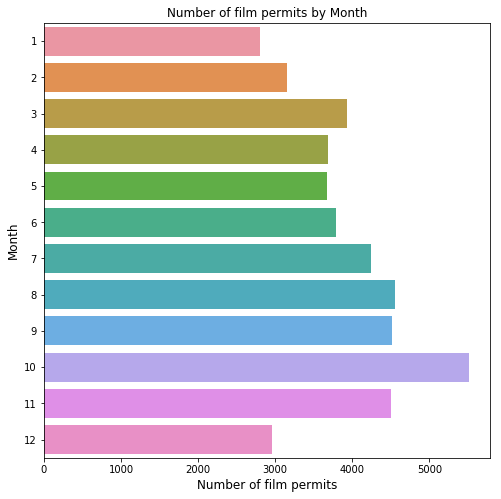

In [6]:
df['month'] = pd.DatetimeIndex(df['start']).month
df['month'].value_counts(dropna = False)

plt.figure(figsize = (8,8))
pic1 = sns.countplot(y="month", data=df)
pic1.set_title("Number of film permits by Month")
pic1.set_xlabel("Number of film permits", fontsize=12)
pic1.set_ylabel("Month", fontsize=12)

plt.show()

Unsurprisingly, October was the most popular month to film, followed by the rest of the fall season: August, September, and November.

The least popular months were in the winter: January was the most unpopular, followed by December (possibly due to the holiday season) and February.

<h2>3. Geographical Analysis</h2><h3>3.1 Number of Permits Issued by Borough</h3>

Each film permit, regardless of the number of zipcodes used, is considered one count for this part of the analysis. Firstly we will see the number of permits issued by borough.

In [7]:
bo = df["borough"].value_counts(dropna =False)

In [8]:
borough_counts = df["borough"].value_counts(dropna =False)

print("Number of permits by Borough")
print(borough_counts)

Number of permits by Borough
Manhattan        23812
Brooklyn         14323
Queens            7359
Bronx             1240
Staten Island      590
Name: borough, dtype: int64


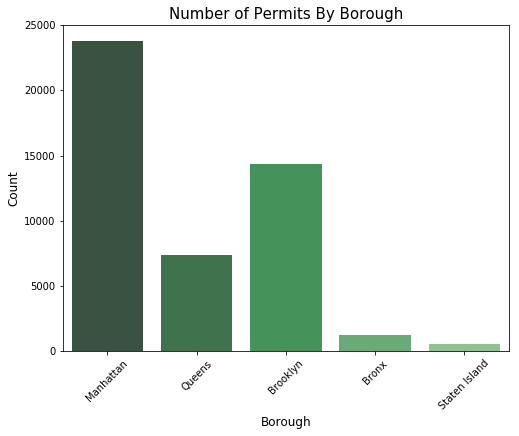

In [9]:
plt.figure(figsize = (8,6))
ax1 = sns.countplot(x="borough", data=df, palette="Greens_d")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Number of Permits By Borough", fontsize=15)
ax1.set_xlabel("Borough", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

plt.show()

In [28]:
st = df[df["category"] == "Red Carpet/Premiere"]
st

,id,event,start,end,enteredon,parkingheld,borough,category,subcategory,zipcode,laun_month_year,laun_year,dead_month_year,dead_year,time_filming,month
37152,308397,Shooting Permit,2016-09-12 06:00:00,2016-09-12 23:59:00,08/30/2016 03:03:39 PM,10 AVENUE between WEST 26 STREET and WEST ...,Manhattan,Red Carpet/Premiere,TV Premiere,10001,2016-09,2016,2016-09,2016,0,9


Unsurprisingly, Manhattan was the most-filmed borough, followed by Brooklyn (my instinct is that those filmed areas in Brooklyn are concentrated by the river with the view of Manhattan).

Next I am curious to know if filming in these boroughs is related to the month or the length of filming.


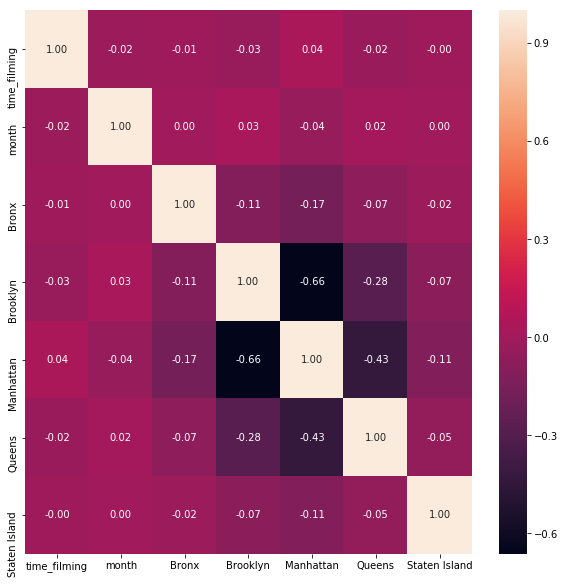

In [10]:
## Create a dummy variable for each borough
borough_dummies = pd.get_dummies(df['borough'].rename(columns=lambda x: 'Borough Dummies'))
df2 = pd.concat([df, borough_dummies], axis=1)

## Plot a correlation matrix and visualize it using Seaborn
plt.figure(figsize = (10,10))
sns.heatmap(df2[df2.columns[1:]].corr(), annot=True, fmt=".2f")
plt.show()

I checked the correlation between the boroughs with the month and length of filming to see if there is any significant correlation between them. 

Borough-to-borough correlations should be ignored. If you were filming in Manhattan you are definitely not filming in Brooklyn at the same time.

Based first two rows, it doesn't seem as if there is a significant relationship between the two variables and the boroughs. The correlation coefficients are very small. However, it is interesting to note that:
<li> If you are filming in Manhattan, you are more likely to film longer. In the other four boroughs, your length of filming is likely to be shorter.
<li> If you are filming in Manhattan, you are likelier to film earlier in the year. In the other four boroughs, you are likelier to film later in the year. 
    
These differences are very small as we are only considering percentage differences of less than 4% for each case.


<h3>3.2 The Most Popular Zipcodes</h3>

Some data rows have more than one zipcode listed per film permit. To conduct the geographical analysis, I will consider each of these zipcodes as one count. To do this, each entry containing more than one zipcode is split into multiple entries containing one respective zipcodes.


In [11]:
df['zipcode'] = df['zipcode'].astype(str) #cast zipcode column as strings
df2 = pd.DataFrame(df.zipcode.str.split(',').tolist(), index=df.id).stack() # split by comma and create new rows
df2 = df2.reset_index()[[0, 'id']] # reset index and remove invalid row 
df2.columns = ['zipcode', 'id'] # rename columns
df2 = df2[['id', 'zipcode']] # reorder columns to match df1
df2['zipcode'] = df2['zipcode'].str.strip()

df3 = pd.merge(df2, df, left_on='id', right_on='id', suffixes=('', '_original')) # Left join df1 and df2 on id
df3 = df3.drop(["zipcode_original"], axis=1)  

In [12]:
print("The top 10 most popular filming locations by zipcodes")
zipcodes = df3["zipcode"].value_counts(dropna =False)
zipcodes.head(10)

The top 10 most popular filming locations by zipcodes


11222    5351
11101    4475
10036    3186
10019    3173
10001    2365
10013    2193
10011    2163
11201    1900
10003    1883
10023    1845
Name: zipcode, dtype: int64

However, unless one is familiar with NYC zipcodes, these don't actually tell us much. A quick Google search shows that 11222 is the zipcode for Greenpoint. This analysis points to Greenpoint as the most popular neighborhood to be filmed, but we will see.

I will now use the data from the NYC Department of Health to label each zipcode with its appropriate neighborhood category. 

Data source: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm

In [13]:
df4 = pd.read_csv("zipcodes.csv")
df4 = df4.drop(df4.columns[2], axis=1)
df4.columns = ['neighborhood', 'zipcode']
df4.head(5)

,neighborhood,zipcode
0,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468"
2,High Bridge and Morrisania,"10451, 10452, 10456"
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Kingsbridge and Riverdale,"10463, 10471"


In [14]:
## Again, I am splitting up the zipcodes into individual rows. 

df4['zipcode'] = df4['zipcode'].astype(str) #cast zipcode column as strings
df5 = pd.DataFrame(df4.zipcode.str.split(',').tolist(), index=df4.neighborhood).stack() # split by comma and create new rows
df5 = df5.reset_index()[[0, 'neighborhood']] # reset index and remove invalid row 
df5.columns = ['zipcode', 'neighborhood'] # rename columns
df5 = df5[['neighborhood', 'zipcode']] # reorder columns to match df1

df6 = pd.merge(df5, df4, left_on='neighborhood', right_on='neighborhood', suffixes=('', '_original')) # Left join df1 and df2 on id
df6 = df6.drop(["zipcode_original"], axis=1)  

df6['zipcode'] = df6['zipcode'].str.strip()


## Set this dataframe to a dictionary so that I have a list of indexes and keys.
## Source: https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary
df6.set_index("zipcode", drop=True, inplace=True)
dictionary = df6.to_dict()
dictionary = dictionary.pop("neighborhood", None)

In [15]:
## Now let's map the neighborhood in the dictionary according to the zipcode in our main dataframe.

df3['neighborhood'] = df3['zipcode'].map(dictionary)

In [16]:
## Some neighborhoods might not be mapped because the dataset might be incomplete.
## To find out, I want to see which zipcodes are not mapped to a neighborhood.

print("Top 5 Unmapped Zipcodes")
nan_rows = df3[df3['neighborhood'].isnull()]
nan_counts = nan_rows["zipcode"].value_counts(dropna =False)
nan_counts.head(5)

Top 5 Unmapped Zipcodes


11249    1282
10121     620
10105     272
10111     144
10112     120
Name: zipcode, dtype: int64

After mapping, there were still some unmapped neighborhoods because of missing data in my second dataset. 

A quick Google search shows that 11249 borders around the Williamsburg area. 10121 borders around Koreatown.  10105, 10111 and 10112 each encompasses a block respectively in the area south of Central Park, all of which I will designate as "Midtown". While I am no real estate expert, I will go ahead and add these zipcode definitions to my dataset. 

Instead of reuploading my dataset, I will just add these 5 new definitions to a new dictionary and re-map it. 

I am also disregarding the remaining unmapped zipcodes for the purposes of continuing with the analysis.

In [17]:
dictionary2 = {'11249': 'Bushwick and Williamsburg', 
               '10121': 'Midtown', 
               '10105': 'Midtown', 
               '10111': 'Midtown',
               '10112': 'Midtown'}         

dictionary.update(dictionary2)
df3['neighborhood'] = df3['zipcode'].map(dictionary)

In [18]:
print("The top 10 most popular filming locations by neighborhood")
neighborhood = pd.DataFrame(df3.neighborhood.value_counts().reset_index())
neighborhood.columns = ['neighborhood', 'count']
neighborhood.head(10)

The top 10 most popular filming locations by neighborhood


,neighborhood,count
0,Chelsea and Clinton,12321
1,Greenpoint,6796
2,Northwest Queens,6346
3,Northwest Brooklyn,5504
4,Greenwich Village and Soho,5334
5,Lower East Side,3856
6,Gramercy Park and Murray Hill,3634
7,Upper West Side,2956
8,Bushwick and Williamsburg,2792
9,Lower Manhattan,2757


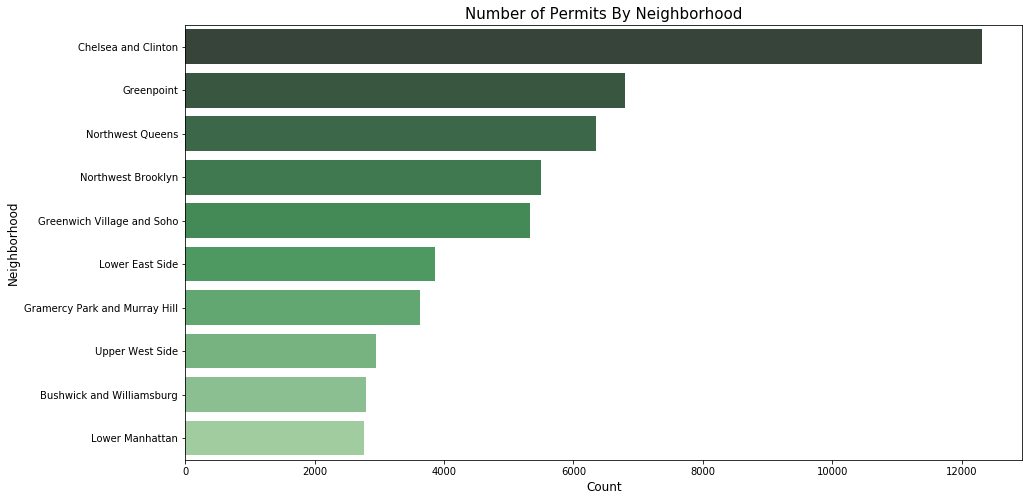

In [19]:
plt.figure(figsize = (15,8))

ax1 = sns.barplot(x="count", y="neighborhood", data=neighborhood.head(10), palette="Greens_d")
ax1.set_title("Number of Permits By Neighborhood", fontsize=15)
ax1.set_xlabel("Count", fontsize=12)
ax1.set_ylabel("Neighborhood", fontsize=12)

plt.show()

Note that this is a significantly different finding from when we were analysing based on only zipcodes. The first geographic analysis by zipcode showed that the Greenpoint zipcode had the highest number of film permits. When aggregrating the zipcodes by neighborhoods, we see a different result. The Chelsea and Clinton area have almost twice the number of film permits issued for Greenpoint. This discrepancy could be due to the fact that zipcodes encompass different sizes of area. 

<h3>3.3 Categories of Film Permits by Neighborhood</h3>

Now I want to see the composition of permit types given out by neighborhood. To start with, I'll check what the unique categories of film permits are.

In [20]:
print("Types of Film Permits and Their Popularity")
categories = pd.DataFrame(df3.category.value_counts().reset_index())
categories.columns = ['category', 'count']
categories.head(10)

Types of Film Permits and Their Popularity


,category,count
0,Television,36716
1,Film,12645
2,Commercial,6793
3,Theater,5221
4,Still Photography,5037
5,WEB,2199
6,Student,362
7,Documentary,257
8,Music Video,231
9,Red Carpet/Premiere,1


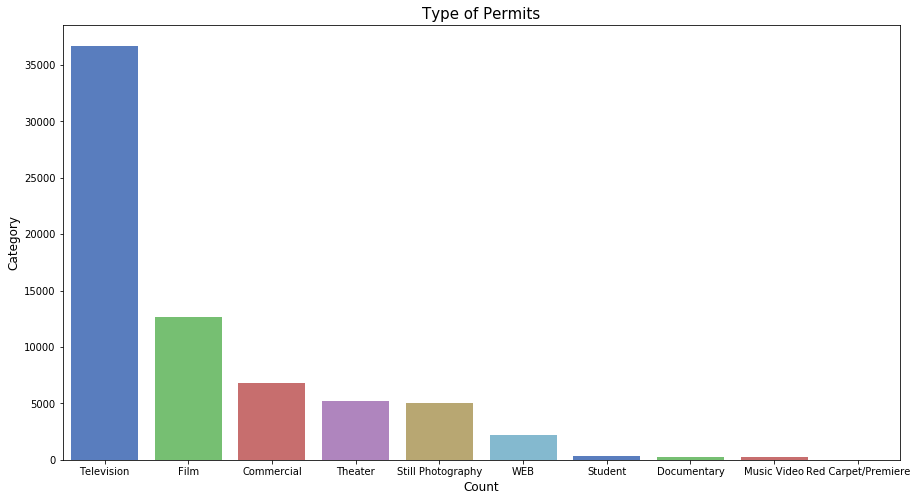

In [21]:
plt.figure(figsize = (15,8))

ax3 = sns.barplot(y="count", x="category", data=categories.head(10), palette="muted")
ax3.set_title("Type of Permits", fontsize=15)
ax3.set_xlabel("Count", fontsize=12)
ax3.set_ylabel("Category", fontsize=12)

plt.show()


Television permits are the most popular permits, surpassing the number the film permits by nearly 3 times. There was an odd incident of a film permit being issued out for a red carpet premiere.

<h3>Top 6 Subcategories of Film Permits</h3>

In [22]:
df.subcategory.unique() 
subcategories = df["subcategory"].value_counts(dropna =False)
subcategories.head(6)

Episodic series    14185
Feature             6792
Not Applicable      6423
Cable-episodic      4997
Theater             4345
Commercial          3250
Name: subcategory, dtype: int64

<h3>Conclusion</h3>
<li>Manhattan was the most popular borough to film in.
<li>Television filming activity made up 53.45% of all film permits.
<li>October was the most popular month to film and January was the least popular month to film in.

In further analyses, I would like to go into cross-analyzing the filming months with the boroughs to test out the hypothesis suggested by the correlation matrix. I would also like to look into the isolated events and match them to the news. 

In [23]:
df3.to_excel('filmpermits.xlsx', sheet_name='sheet1', index=False)